<a href="https://colab.research.google.com/github/chw8207/ADP-study/blob/master/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

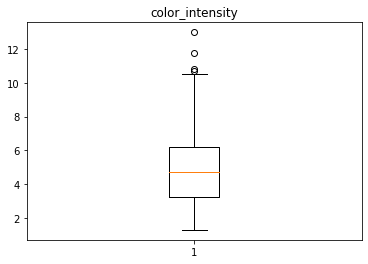

In [ ]:
# IQR 방식으로 이상치 탐색
# 데이터 가져오기
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns = wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0:'class_0', 1:'class_1', 2:'class_2'})

# 상자그림 그리기
plt.boxplot(wine['color_intensity'], whis = 1.5)
plt.title('color_intensity')
plt.show()

In [ ]:
# 이상치의 위치와 값 확인하기
import numpy as np
def outliers_iqr(dt, col) : 
  quartile_1, quartile_3 = np.percentile(dt[col], [25, 75])
  iqr = quartile_3 - quartile_1
  lower_whis = quartile_1 - (iqr * 1.5)
  upper_whis = quartile_3 + (iqr * 1.5)
  outliers = dt[(dt[col] > upper_whis) | (dt[col] < lower_whis)]
  return outliers[[col]]

outliers = outliers_iqr(wine, 'color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [ ]:
# 이상치 제거
drop_outliers = wine.drop(index = outliers.index)

# 이상치를 삭제하기 전과 후의 데이터 shape
print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [ ]:
# wine 데이터세트의 color_intensity의 이상치를 평균값으로 대체하기
# 이상치를 NaN으로 변경
wine.loc[outliers.index, 'color_intensity'] = np.NaN

# NaN이 된 이상치를 평균값으로 변경
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean())
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

### 범주형 변수 처리

In [ ]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [ ]:
iris_dummy = pd.get_dummies(iris, columns = ['Class'])
iris_dummy

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


### 데이터 분할

In [ ]:
# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [ ]:
# 데이터 분할하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = ['Class']),
                                                    iris['Class'], test_size = 0.2, 
                                                    random_state = 1004)

# 크기 확인
print('X_train :', X_train.shape, 'X_test :', X_test.shape)
print('y_train :', y_train.shape, 'y_test :', y_test.shape)

X_train : (120, 4) X_test : (30, 4)
y_train : (120,) y_test : (30,)


In [ ]:
X_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
87,6.3,2.3,4.4,1.3
67,5.8,2.7,4.1,1.0
131,7.9,3.8,6.4,2.0


In [ ]:
y_train.head(3)

87     Versicolour
67     Versicolour
131      Virginica
Name: Class, dtype: object

In [ ]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [ ]:
y_train.value_counts()

Versicolour    41
Setosa         40
Virginica      39
Name: Class, dtype: int64

In [ ]:
# 층화임의추출(stratify활용)
X_train, X_test, y_train, y_test = train_test_split(iris.drop(columns = 'Class'),
                                                    iris['Class'], test_size = 0.2,
                                                    stratify = iris['Class'])

In [ ]:
# 크기 확인
print('X_train :', X_train.shape, '\tX_test :', X_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

X_train : (120, 4) 	X_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [ ]:
y_train.value_counts()

Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

### 데이터 스케일링

In [ ]:
# 1. standard scaler(표준화 방식)
# 최소값 최대값의 크기를 제한하지 않아 이상치에 매우 민감함
# 분류분석에 유용하다.
from sklearn.preprocessing import StandardScaler
StdScaler = StandardScaler()

# train데이터의 fitting과 스케일링
StdScaler.fit(X_train)
X_train_sc = StdScaler.transform(X_train)

# test데이터의 스케일링
X_test_sc = StdScaler.transform(X_test)

# 결과 확인
print('\t\t(min, max) (mean, std)')
print('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(),
                                                X_test_sc.max(),
                                                X_test_sc.mean(),
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.35, 2.97) (-0.00, 1.00)
Test_scaled (-1.68, 2.08) (0.03, 0.90)


In [ ]:
# 2. Min-max Scaler
# 0과 1 사이 값으로 스케일링
# 이상치에 민감함
# 회귀에 유용하다.
from sklearn.preprocessing import MinMaxScaler
MmScaler = MinMaxScaler()

# train데이터의 fitting과 스케일링
MmScaler.fit(X_train)
X_train_sc = MmScaler.transform(X_train)

# test데이터의 스케일링
X_test_sc = MmScaler.transform(X_test)

# 결과 확인
print('\t\t(min, max) (mean, std)')
print('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(),
                                                X_test_sc.max(),
                                                X_test_sc.mean(),
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.27)
Test_scaled (0.03, 0.92) (0.46, 0.25)


In [ ]:
# 3. Max Abs Scaler
# 최대절댓값 = 1, 0 = 1로 스케일링
# 모든 값 : -1 ~ 1
# 데이터가 양수인 경우 Min Max Scaler와 동일
# 이상치에 민감하며 회귀분석에 유용하다.
from sklearn.preprocessing import MaxAbsScaler
MaScaler = MaxAbsScaler()

# train 데이터의 fitting과 스케일링
MaScaler.fit(X_train)
X_train_sc = MaScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = MaScaler.transform(X_test)

# 결과 확인
print('\t\t(min, max) (mean, std)')
print('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(),
                                                X_test_sc.max(),
                                                X_test_sc.mean(),
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.61, 0.24)
Test_scaled (0.08, 0.94) (0.62, 0.23)


In [ ]:
# 4. Robust Scaler
# 중앙값과 사분위 값을 활용
# 이상치의 영을 최소화
from sklearn.preprocessing import RobustScaler
RuScaler = RobustScaler()

# train 데이터의 fitting과 스케일링
RuScaler.fit(X_train)
X_train_sc = RuScaler.transform(X_train)

# test 데이터의 스케일링
X_test_sc = RuScaler.transform(X_test)

# 결과 확인
print('\t\t(min, max) (mean, std)')
print('Train_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_train_sc.min(),
                                                X_train_sc.max(),
                                                X_train_sc.mean(),
                                                X_train_sc.std()))
print('Test_scaled (%.2f, %.2f) (%.2f, %.2f)'%(X_test_sc.min(),
                                                X_test_sc.max(),
                                                X_test_sc.mean(),
                                                X_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-1.67, 2.33) (-0.01, 0.62)
Test_scaled (-1.17, 1.67) (0.00, 0.55)


In [ ]:
# 5. 원본 스케일로 변경하기 : scaler.invers_transform()
# 스케일링된 데이터 확인
pd.DataFrame(X_train_sc).head()

,0,1,2,3
0,-0.615385,0.166667,-0.805556,-0.800000
1,1.230769,-0.166667,0.527778,0.333333
2,0.846154,-0.333333,0.111111,0.066667
3,-0.384615,0.666667,-0.833333,-0.733333
4,0.615385,-0.333333,0.055556,0.133333


In [ ]:
# 원본 스케일로 변경
X_Original = RuScaler.inverse_transform(X_train_sc)

pd.DataFrame(X_Original).head(3)

,0,1,2,3
0,4.9,3.1,1.5,0.1
1,7.3,2.9,6.3,1.8
2,6.8,2.8,4.8,1.4


### 차원 축소

In [ ]:
# 1. 주성분 분석(PCA)
# 주성분 분석 순서
# 1. 전처리

# 데이터 불러오기
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris = pd.DataFrame(iris.data, columns = iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0:'Setosa', 1:'Versicolour', 2:'Virginica'})

In [ ]:
# 수치형 데이터만 추출
features = ['수치형 변수1', '수치형 변수2']
x = iris.drop(columns = 'Class')

# 수치형 변수 정규화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(x)

pd.DataFrame(x).head(5)

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# 2. 주성분 추출
# singular_values_ : 전체 데이터에서 해당 모델로 설명할 수 있는 분산의 비율
# explained_variance_ratio_ : 전체 데이터에서 각 주성분이 설명할 수 있는 분산의 비율
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)   # n_components : 생성할 주성분의 갯수
pca_fit = pca.fit(x)

print('고유 값 : ', pca.singular_values_)
print('분산 설명력 : ', pca.explained_variance_ratio_)

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력 :  [0.72962445 0.22850762 0.03668922 0.00517871]


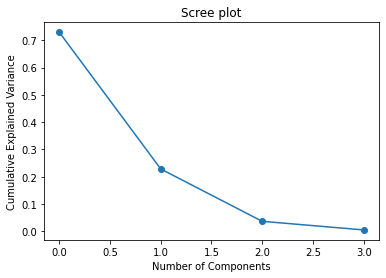

In [ ]:
# 3. Scree plot으로 사용할 주성분의 개수 정하기
import matplotlib.pyplot as plt

plt.title('Scree plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.show()

In [ ]:
# 4. 새로운 데이터프레임 확인
# PCA객체 생성
pca = PCA(n_components = 2)

# 2개의 주성분을 가진 데이터로 변환
principalComponents = pca.fit_transform(x)  
principal_iris = pd.DataFrame(data = principalComponents, columns = ['pc1', 'pc2'])
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


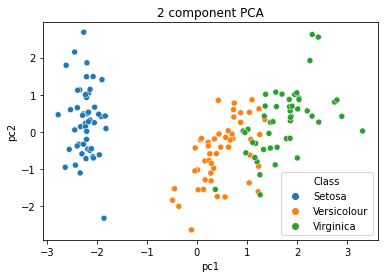

In [ ]:
# 5. 주성분 산포도 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt. title('2 component PCA')
sns.scatterplot(x = 'pc1', y = 'pc2', hue = iris.Class, data = principal_iris)
plt.show()

### 데이터 불균형 문제 처리

In [ ]:
# 1. 언더 샘플링
# 전체 데이터 수가 급격히 줄어들어 학습 성능을 떨어뜨릴 수 있음
# imblearn(imbalanced-learn)모듈 설치
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
# 1. 95:1의 불균형 데이터 만들기
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
x, y = make_classification(n_samples = 2000, n_features = 6, weights = [0.95],
                           flip_y = 0)
print(Counter(y))

Counter({0: 1900, 1: 100})


In [9]:
# random under sampling
# sampling_strategy='majority' : 다수 레이블의 데이터를 샘플링하여
#                                소수 레이블의 데이터 수와 동일하게 줄인다.
# 0~1 숫자값 지정 : 소수 레이블의 데이터 수와 다수 레이블의 데이터 수가
#                   해당 비율이 되도록 조정함.
undersample = RandomUnderSampler(sampling_strategy = 'majority')
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [ ]:
undersample = RandomUnderSampler(sampling_strategy = 0.5)
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


In [17]:
# 2. 오버 샘플링
# 데이터의 손실이 없어 일반적으로 언더 샘플링보다 성능이 유리하다.
# 1) 랜덤 오버샘플링
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy = 0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [18]:
oversample = RandomOverSampler(sampling_strategy = 'minority')
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


In [19]:
# 2) SMOTE(Synthetic Minority Over-sampling Technique)
# K개의 최근접 이웃(K-Nearest Neighbor)활용
# 관측값과 이웃으로 선택된 값 사이에 임의의 새로운 데이터를 생성
from imblearn.over_sampling import SMOTE
smote_sample = SMOTE(sampling_strategy = 'minority')
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

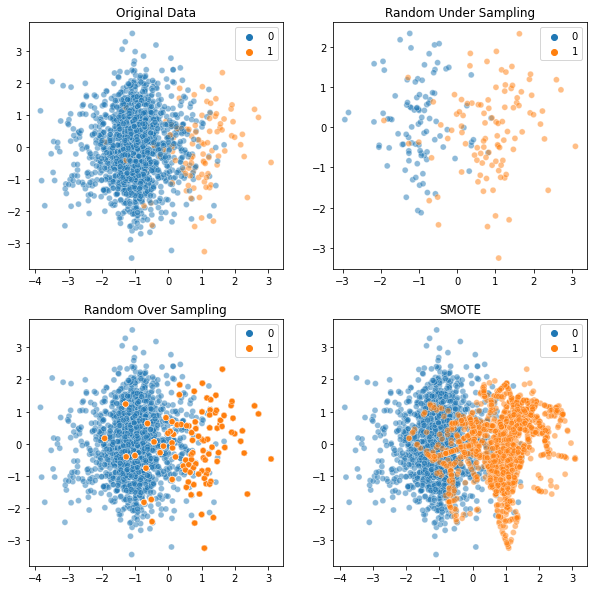

In [20]:
# 그래프로 시각화하기
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
sns.scatterplot(x[:, 1], x[:, 2], hue = y, ax = axes[0][0], alpha = 0.5)
sns.scatterplot(x_under[:, 1], x_under[:, 2], hue = y_under, ax = axes[0][1],
                alpha = 0.5)
sns.scatterplot(x_over[:, 1], x_over[:, 2], hue = y_over, ax = axes[1][0],
                alpha = 0.5)
sns.scatterplot(x_sm[:, 1], x_sm[:, 2], hue = y_sm, ax = axes[1][1],
                alpha = 0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[1][0].set_title('Random Over Sampling')
axes[1][1].set_title('SMOTE')

plt.show()